In [75]:
import numpy as np
import pandas as pd
import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import t
from scipy.stats import norm
from statsmodels.formula.api import ols

# importera palmer penguins

pathcars = pd.read_csv("../Ai22Statistik/data/cars.csv")
df = pd.DataFrame(pathcars)
df = df.dropna() # Plocka bort rader som innehåller NaN

In [76]:
eu_orgin_con = ["europe"]
usa_orgin_con = ["usa"]

df_usa_cars = df[df["origin"].isin(usa_orgin_con)]
df_eu_cars = df[df["origin"].isin(eu_orgin_con)]

df_usa_cars["origin"]


0      usa
1      usa
2      usa
3      usa
4      usa
      ... 
392    usa
393    usa
395    usa
396    usa
397    usa
Name: origin, Length: 245, dtype: object

In [77]:
print("us cars")
print(df_usa_cars["model_year"].max())
print(df_usa_cars["model_year"].min())


print("eu cars")
print(df_eu_cars["model_year"].max())
print(df_eu_cars["model_year"].min())

us cars
82
70
eu cars
82
70


In [78]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger



Uppdrag: Jag vill undersöka Medelvärde, median och standardavvikelse. 

### *Frågeställning*: 
Vad är den genomsnittliga bränsleförbrukningen, medianen och standardavvikelsen för bilar från Europa och USA?

#### Hypotes
Amerikanska bilar kommer ha en genomsnittlig högre bränsleförbrukning

$$\overline{x} = \frac{\sum_{i=1}^{n} x_i}{n}$$




In [79]:
"""Jag använder mig av mean funktionen. man tar n vilket är antalet rader, och adderar alla värden i "mpg" och därefter divderar n """

print(df_eu_cars["mpg"].mean())
print(df_eu_cars["horsepower"].mean())

27.602941176470587
80.55882352941177


In [80]:
print(df_usa_cars["mpg"].mean())
print(df_usa_cars["horsepower"].mean())

20.0334693877551
119.04897959183674


In [81]:
print(df_usa_cars["mpg"].median())

18.5


<AxesSubplot: ylabel='mpg'>

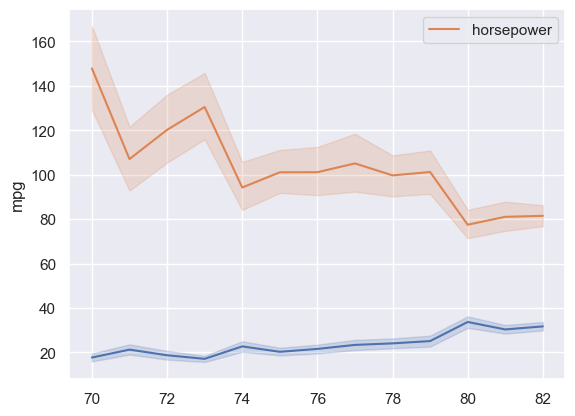

In [97]:
ax = plt.axes()

year = [i for i in df["model_year"]]

sns.lineplot(x=year, y=df["mpg"], ax = ax, label = "")

sns.lineplot(x=year, y=df["horsepower"], label = "horsepower")


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

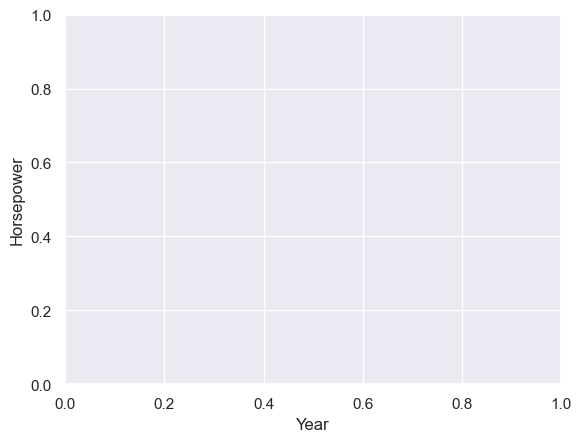

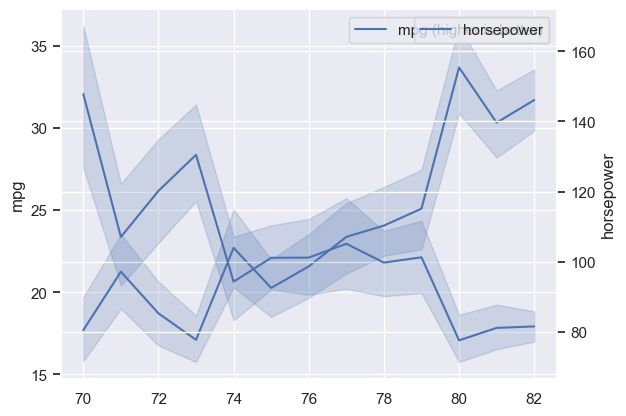

In [107]:
ax = plt.axes()

year = [i for i in df["model_year"]]
fig, ax1 = plt.subplots()

sns.lineplot(x=year, y=df["mpg"], ax = ax1, label = "mpg (higher is better)")
ax2 = ax1.twinx() 
sns.lineplot(x=year, y=df["horsepower"], ax=ax2, label = "horsepower")

ax.set(xlabel="Year", ylabel="Horsepower")






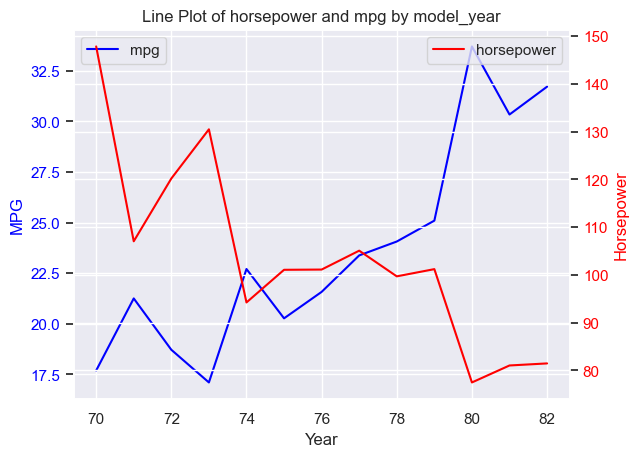

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset("mpg")
year = [i for i in df["model_year"]]

fig, ax1 = plt.subplots()

color1 = "blue"
ax1.set_xlabel("Year")
ax1.set_ylabel("MPG", color=color1)
sns.lineplot(x=year, y=df["mpg"], color=color1, ax = ax1, label = "mpg", errorbar=None)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = "red"
ax2.set_ylabel("Horsepower", color=color2)  # we already handled the x-label with ax1
sns.lineplot(x=year, y=df["horsepower"], color=color2, ax=ax2, label = "horsepower", errorbar=None)
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("Line Plot of horsepower and mpg by model_year")
plt.legend()

plt.show()